# Intro to numerical methods and gradient descent


## Analytical results
- FOOC

if $x^*$ is a local minimum of differentiable function $f$, then  

$$
f'(x^*) = 0
$$

- Second order optimality condition

if $x^*$ is a local minimum of twice differentiable function $f(x)$, then 

$$
f'(x^*) = 0 \quad \text{and} \quad f''(x^*) \succeq 0
$$

- Sufficient condition: 

if $f(x)$ is twice differentiable function, and if $x^*$ is satisfied

$$
f'(x^*) = 0 \quad f''(x^*) \succ 0,
$$

then $x^*$ is a local minimum of $f(x)$.

## Features of numerical solving of optimization problems

1. Machine precision
2. Stopping criterion
3. Info about the problem

## General scheme


```python

def GeneralScheme(x, epsilon):
    
    while StopCriterion(x) > epsilon:
        
        OracleResponse = RequestOracle(x)
        
        UpdateInformation(I, x, OracleResponse)
        
        x = NextPoint(I, x)
        
    return x
```

### Stopping criteria
1. Target vector: 

$$
\| x_k - x^*  \|_2 < \varepsilon
$$ 

2. Objective function

$$
\| f_k - f^* \|_2 < \varepsilon
$$ 

3. FOOC for unconstrained optimization

$$
\| f'(x_k) \|_2 < \varepsilon
$$

### Update rule

$$
x_{k+1} = x_{k} + \alpha_k h_k
$$

### Questions
1. How to choose $\alpha_k$?
2. How to choose $h_k$?

## How to compare optimization methods?

1. Complexity
2. Convergence speed
3. Experiments

### Convergence speed

_1._ Sublinear

$$
\| x_{k+1} - x^* \|_2 \leq C k^{\alpha},
$$

where $\alpha < 0$ and $ 0 < C < \infty$

_2._ Linear

$$
\| x_{k+1} - x^* \|_2 \leq Cq^k, 
$$

where $q \in (0, 1)$ and $ 0 < C < \infty$

_3._ Superlinear 

$$
\| x_{k+1} - x^* \|_2 \leq Cq^{k^p}, 
$$

where $q \in (0, 1)$, $ 0 < C < \infty$ and $p > 1$

_4._ Quadratic

$$
\| x_{k+1} - x^* \|_2 \leq C\| x_k - x^* \|^2_2, \qquad \text{or} \qquad \| x_{k+1} - x^* \|_2 \leq C q^{2^k}
$$

where $q \in (0, 1)$ and $ 0 < C < \infty$

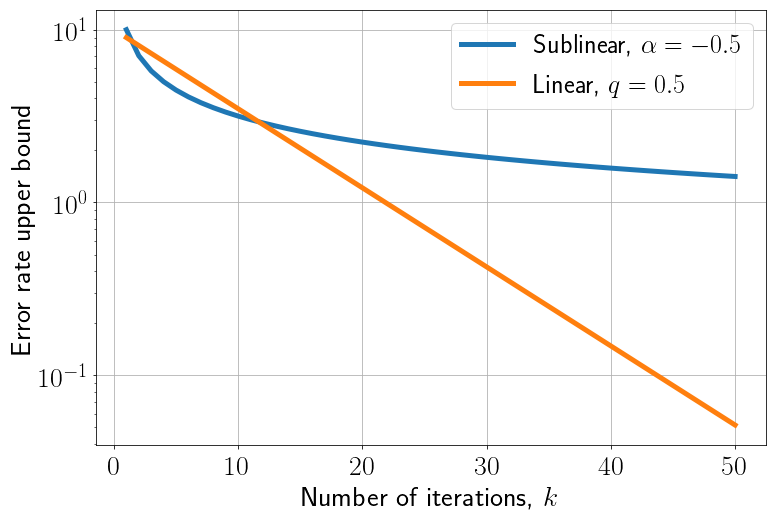

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc("text", usetex=True)

import numpy as np
C = 10
alpha = -0.5
q = 0.9
num_iter = 50
sublinear = np.array([C * k**alpha for k in range(1, num_iter + 1)])
linear = np.array([C * q**k for k in range(1, num_iter + 1)])
superlinear = np.array([C * q**(k**2) for k in range(1, num_iter + 1)])
quadratic = np.array([C * q**(2**k) for k in range(1, num_iter + 1)])
plt.figure(figsize=(12,8))
plt.semilogy(np.arange(1, num_iter+1), sublinear, 
             label=r"Sublinear, $\alpha = -0.5$", linewidth=5)
# plt.semilogy(np.arange(1, num_iter+1), superlinear, linewidth=5,
#              label=r"Superlinear, $q = 0.5, p=2$")
plt.semilogy(np.arange(1, num_iter+1), linear, 
             label=r"Linear, $q = 0.5$", linewidth=5)
# plt.semilogy(np.arange(1, num_iter+1), quadratic, 
#              label=r"Quadratic, $q = 0.5$", linewidth=5)
plt.xlabel("Number of iterations, $k$", fontsize=28)
plt.ylabel("Error rate upper bound", fontsize=28)
plt.legend(loc="best", fontsize=26)
plt.xticks(fontsize = 28)
_ = plt.yticks(fontsize = 28)
plt.grid(True)

## Order of methods
1. Zero-order methods

2. First-order methods

3. Second-order method

4. Higher order methods

## Steps 

1. One-step methods 

$$
x_{k+1} = \Phi(x_k)
$$

2. Multi-step methods

$$
x_{k+1} = \Phi(x_k, x_{k-1}, ...)
$$

## One-dimensional minimization

**Definition**. Function $f(x)$ is called unimodal in segment $[a, b]$, if there exists a point  $x^* \in [a, b]$, such that 
- $f(x_1) > f(x_2)$ for all $a \leq x_1 < x_2 < x^*$, 

and

- $f(x_1) < f(x_2)$ for all $x^* < x_1 < x_2 \leq b$.

### Bisection method

- $N$ is a number of function $f$ calling
- $K = \frac{N - 1}{2}$ - number of iterations

Then

$$
|x_{K+1} - x^*| \leq \frac{b_{K+1} - a_{K+1}}{2} = \left( \frac{1}{2} \right)^{\frac{N-1}{2}} (b - a) \approx 0.5^{K} (b - a) 
$$

In [18]:
# [a, c, b]
# [a, y, c, b]
# [a, y, c, z, b]

def binary_search(f, a, b, epsilon, callback=None):
    c = (a + b) / 2.0
    while abs(b - a) > epsilon:
#         Check left subsegment
        y = (a + c) / 2.0
        if f(y) <= f(c):
            b = c
            c = y
        else:
#         Check right subsegment
            z = (b + c) / 2.0
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
        if callback is not None:
            callback(a, b)
    return c

In [19]:
def my_callback(a, b, left_bound, right_bound, approximation):
    left_bound.append(a)
    right_bound.append(b)
    approximation.append((a + b) / 2.0)

9.313225746154785e-10


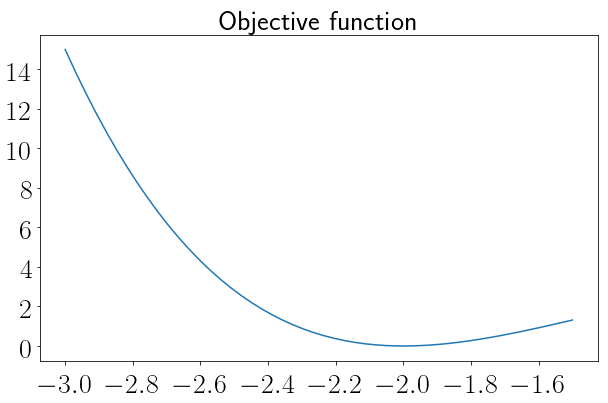

In [20]:
import numpy as np

left_boud_bs = []
right_bound_bs = []
approximation_bs = []

callback_bs = lambda a, b: my_callback(a, b, 
            left_boud_bs, right_bound_bs, approximation_bs)

# Target unimodal function on given segment
f = lambda x: (x - 2) * x * (x + 2)**2 # np.power(x+2, 2)
# f = lambda x: -np.sin(x)
x_true = -2
# x_true = np.pi / 2.0
a = -3
b = -1.5
epsilon = 1e-8
x_opt = binary_search(f, a, b, epsilon, callback_bs)
print(np.abs(x_opt - x_true))
plt.figure(figsize=(10,6))
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.title("Objective function", fontsize=28)
plt.xticks(fontsize = 28)
_ = plt.yticks(fontsize = 28)

### Golden section search

Idea: 

split segment $[a,b]$ in the golden ratio.

Convergence speed estimate:

$$
|x_{K+1} - x^*| \leq b_{K+1} - a_{K+1} = \left( \frac{1}{\tau} \right)^{N-1} (b - a) \approx 0.618^K(b-a),
$$
where $\tau = \frac{\sqrt{5} + 1}{2}$.

In [21]:
def golden_search(f, a, b, tol=1e-5, callback=None):
    tau = (np.sqrt(5) + 1) / 2.0
    y = a + (b - a) / tau**2
    z = a + (b - a) / tau
    while b - a > tol:
        if f(y) <= f(z):
            b = z
            z = y
            y = a + (b - a) / tau**2
        else:
            a = y
            y = z
            z = a + (b - a) / tau
        if callback is not None:
            callback(a, b)
    return (a + b) / 2.0

In [22]:
left_boud_gs = []
right_bound_gs = []
approximation_gs = []

cb_gs = lambda a, b: my_callback(a, b, left_boud_gs, right_bound_gs, approximation_gs)
x_gs = golden_search(f, a, b, epsilon, cb_gs)

print(f(x_opt))
print(f(x_gs))
print(np.abs(x_opt - x_true))

6.93889390875399e-18
9.549014390504221e-18
9.313225746154785e-10


### Comparison

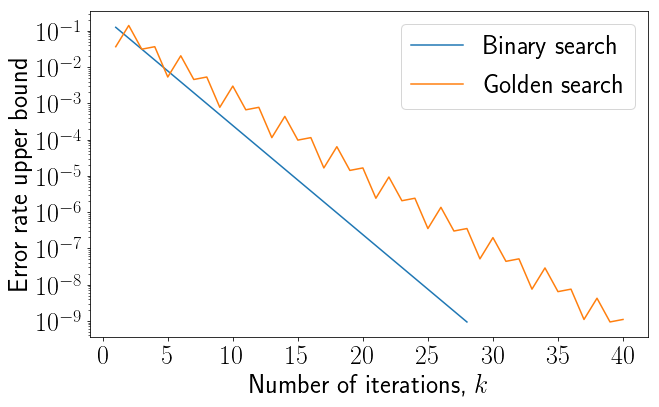

In [23]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, len(approximation_bs) + 1), np.abs(x_true - np.array(approximation_bs, dtype=np.float64)), label="Binary search")
plt.plot(np.arange(1, len(approximation_gs) + 1), np.abs(x_true - np.array(approximation_gs, dtype=np.float64)), label="Golden search")
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel("Error rate upper bound", fontsize=26)
plt.legend(loc="best", fontsize=26)
plt.yscale("log")
plt.xticks(fontsize = 26)
_ = plt.yticks(fontsize = 26)

In [24]:
%timeit binary_search(f, a, b, epsilon)
%timeit golden_search(f, a, b, epsilon)

23.1 µs ± 131 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
130 µs ± 3.17 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Another option

$$
f(x) = \sin(\sin(\sin(\sqrt{x}))), \; x \in [2, 60]
$$

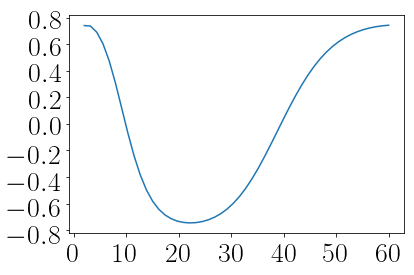

In [25]:
f = lambda x: np.sin(np.sin(np.sin(np.sqrt(x))))
x_true = (3 * np.pi / 2)**2
a = 2
b = 60
epsilon = 1e-10
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.xticks(fontsize = 28)
_ = plt.yticks(fontsize = 28)

## Convergence speed comparison

### Bisection

In [31]:
left_boud_bs = []
right_bound_bs = []
approximation_bs = []
epsilon = 1e-4
callback_bs = lambda a, b: my_callback(a, b, 
            left_boud_bs, right_bound_bs, approximation_bs)

x_opt = binary_search(f, a, b, epsilon, callback_bs)
print(np.abs(x_opt - x_true))

1.1620590704808365e-05


### Golden search

In [32]:
left_boud_gs = []
right_bound_gs = []
approximation_gs = []

cb_gs = lambda a, b: my_callback(a, b, left_boud_gs, right_bound_gs, approximation_gs)
x_gs = golden_search(f, a, b, epsilon, cb_gs)

print(np.abs(x_opt - x_true))

1.1620590704808365e-05


### Convergence

Text(0, 0.5, 'Error rate upper bound')

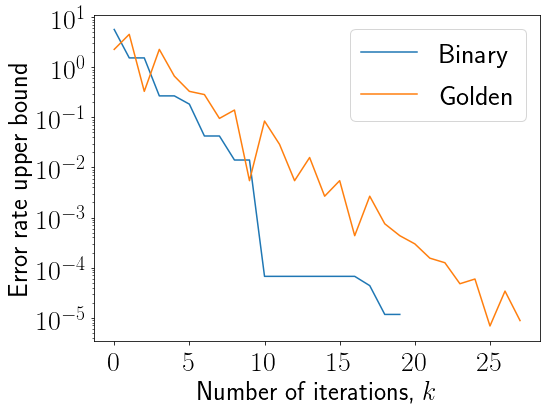

In [33]:
plt.figure(figsize=(8,6))
plt.semilogy(np.abs(x_true - np.array(approximation_bs, dtype=np.float64)), label="Binary")
plt.semilogy(np.abs(x_true - np.array(approximation_gs, dtype=np.float64)), label="Golden")
plt.legend(fontsize=28)
plt.xticks(fontsize=28)
_ = plt.yticks(fontsize=28)
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel("Error rate upper bound", fontsize=26)

### Running time

In [34]:
%timeit binary_search(f, a, b, epsilon)
%timeit golden_search(f, a, b, epsilon)

393 µs ± 17.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
341 µs ± 2.44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Summary

1. Intro to numerical optimization methods
2. Convergence speed
3. One-dimensional optimization methods

## Descent methods. Gradient descent 

```python
def DescentMethod(f, x0, epsilon, **kwargs):
    
    x = x0
    
    while StopCriterion(x, f, **kwargs) > epsilon:
        
        h = ComputeDescentDirection(x, f, **kwargs)
        
        alpha = SelectStepSize(x, h, f, **kwargs)
        
        x = x + alpha * h
        
    return x


```

## Gradient descent

```python
def GradientDescentMethod(f, x0, epsilon, **kwargs):
    
    x = x0
    
    while StopCriterion(x, f, **kwargs) > epsilon:
        
        h = ComputeGradient(x, f, **kwargs)
        
        alpha = SelectStepSize(x, h, f, **kwargs)
        
        x = x - alpha * h
        
    return x

```

## How to choose $\alpha_k$? (J. Nocedal, S. Wright Numerical Optimization, $\S$ 3.1.)

$$ 
x_{k+1} = x_k + \alpha_k h_k, 
$$

where $h_k$ is a direction (from $\mathbb{R}^n$) and $\alpha_k > 0$ is a step size

- Constant

$$
\alpha_k = \overline{\alpha}
$$

- Decreasing sequence

$$
\alpha_k = \dfrac{\overline{\alpha}}{\sqrt{k+1}}
$$

- Steepest descent

$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$

- For some $\beta_1, \beta_2$, such that $0 < \beta_1 < \beta_2 < 1$ find $x_{k+1}$ such that

    - Sufficient decreasing: $f(x_{k+1}) \leq f(x_k) + \beta_1 \alpha_k \langle f'(x_k), h_k \rangle$ or
    $ f(x_k) - f(x_{k+1}) \geq \beta_1 \alpha_k \langle f'(x_k), h_k \rangle
    $
    - Significant decreasing: $f(x_{k+1}) \geq f(x_k) + \beta_2 \alpha_k \langle f'(x_k), h_k \rangle$ or
    $
    f(x_k) - f(x_{k+1}) \leq \beta_2 \alpha_k \langle f'(x_k), h_k \rangle
    $
    - Curvature condition: $\langle f'(x_{k+1}), h_k \rangle \geq \beta_2 \langle f'(x_k), h_k \rangle$

Typical values for coefficients $\beta_1 \in (0, 0.3)$, and $\beta_2 \in (0.9, 1)$

### Alternative naming

- Sufficient decreasing $\equiv$ Armijo rule
- Sufficient decreasing + curvature condition $\equiv$ Wolfe rule
- Sufficient decreasing + significant decreasing $\equiv$ Goldstein rule

## Why do we need significant decreasing?

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
import ipywidgets as ipywidg
import numpy as np
# !pip install git+https://github.com/amkatrutsa/liboptpy
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss
from tqdm import tqdm

<IPython.core.display.Javascript object>


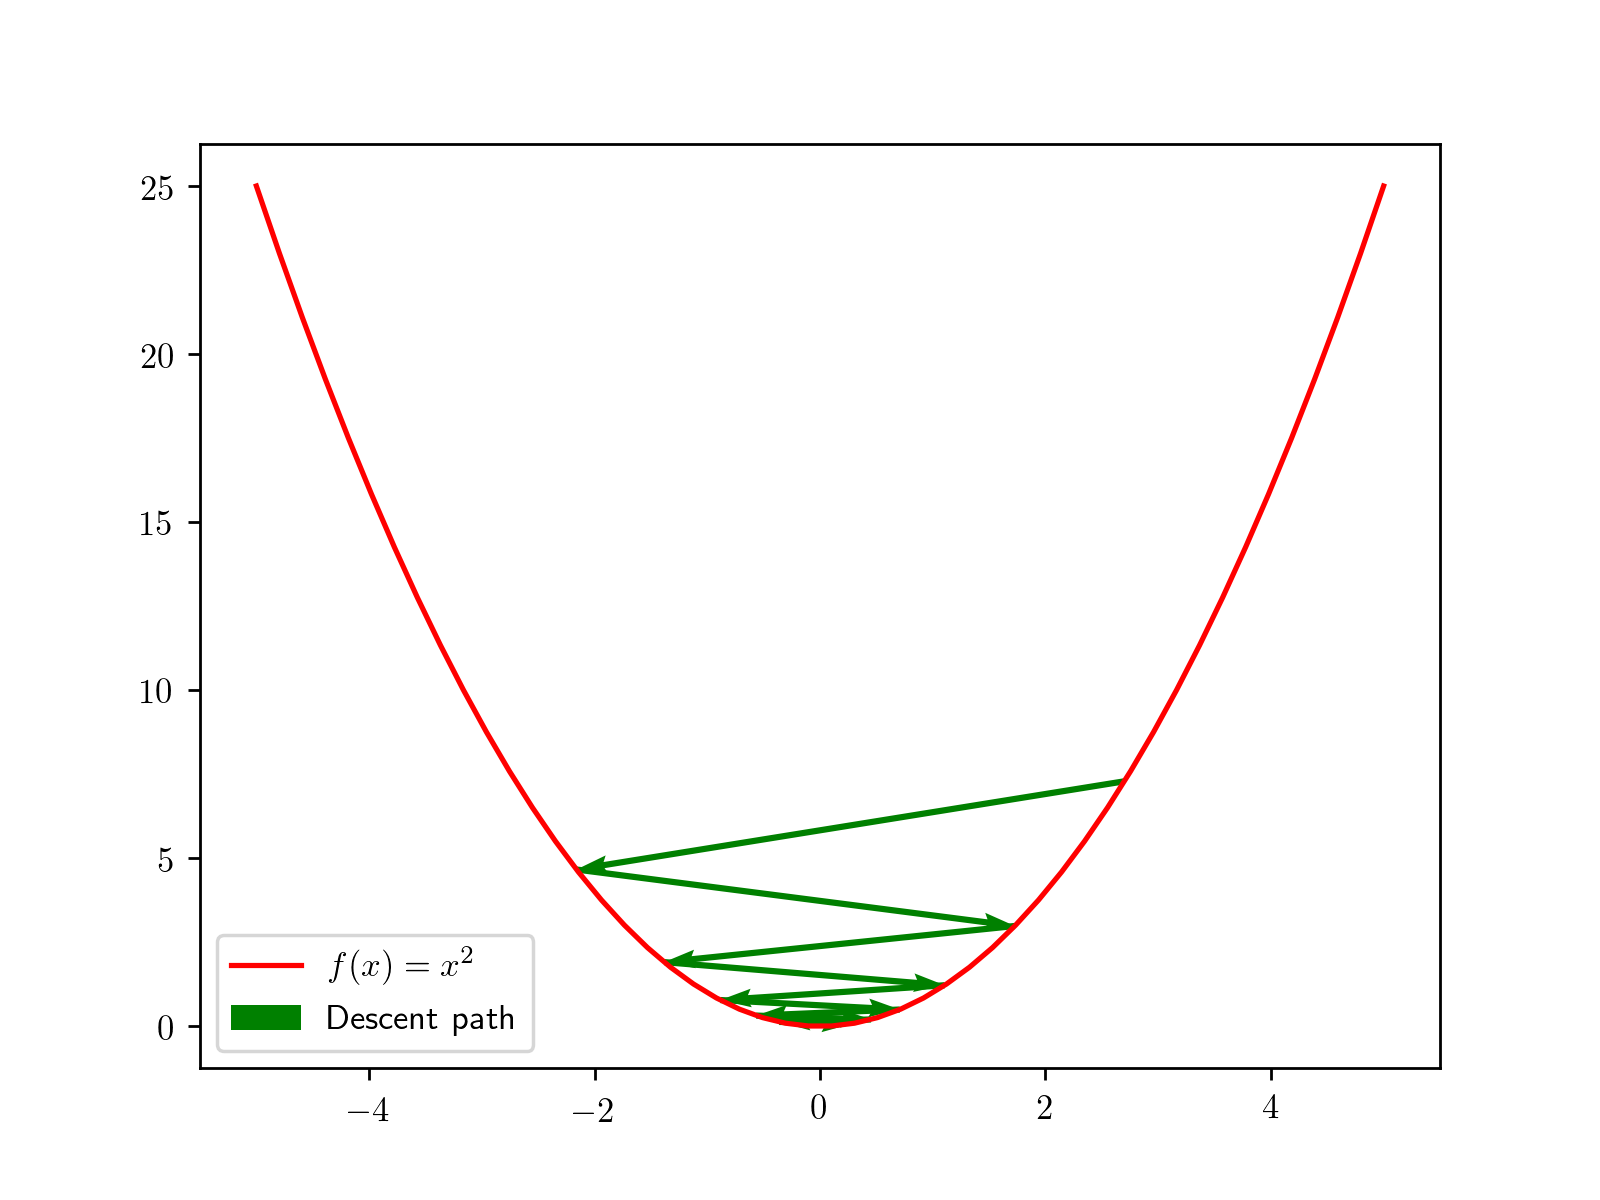

interactive(children=(FloatSlider(value=1.5, description='Initial point', max=4.0, min=-4.0), FloatSlider(valu…

In [2]:
f = lambda x: np.power(x, 2)
gradf = lambda x: 2 * x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)



def update(x0, step):
    gd = methods.fo.GradientDescent(f, gradf, ss.ConstantStepSize(step))
    _ = gd.solve(np.array([x0]), max_iter=10)
    x_hist = gd.get_convergence()
    x = np.linspace(-5, 5)
    ax.clear()
    ax.plot(x, f(x), color="r", label="$f(x) = x^2$")
    y_hist = np.array([f(x) for x in x_hist])
    x_hist = np.array(x_hist)
    plt.quiver(x_hist[:-1], y_hist[:-1], x_hist[1:]-x_hist[:-1], y_hist[1:]-y_hist[:-1], 
               scale_units='xy', angles='xy', scale=1, width=0.005, color="green", label="Descent path")
    ax.legend()
    fig.canvas.draw()

step_slider = ipywidg.FloatSlider(value=0.8, min=0, max=1.2, step=0.1, description="Step")
x0_slider = ipywidg.FloatSlider(value=1.5, min=-4, max=4, step=0.1, description="Initial point")
_ = ipywidg.interact(update, x0=x0_slider, step=step_slider)

In [3]:
def plot_alpha(f, grad, x, h, alphas, beta1, beta2):
    df = np.zeros_like(alphas)
    for i, alpha in enumerate(alphas):
        df[i] = f(x + alpha * h)
    upper_bound = f(x) + beta1 * alphas * grad(x) * h
    lower_bound = f(x) + beta2 * alphas * grad(x) * h
    plt.plot(alphas, df, label=r"$f(x + \alpha h)$")
    plt.plot(alphas, upper_bound, label="Upper bound")
    plt.plot(alphas, lower_bound, label="Lower bound")
    plt.xlabel(r"$\alpha$", fontsize=18)
    plt.legend(loc="best", fontsize=18)

<IPython.core.display.Javascript object>


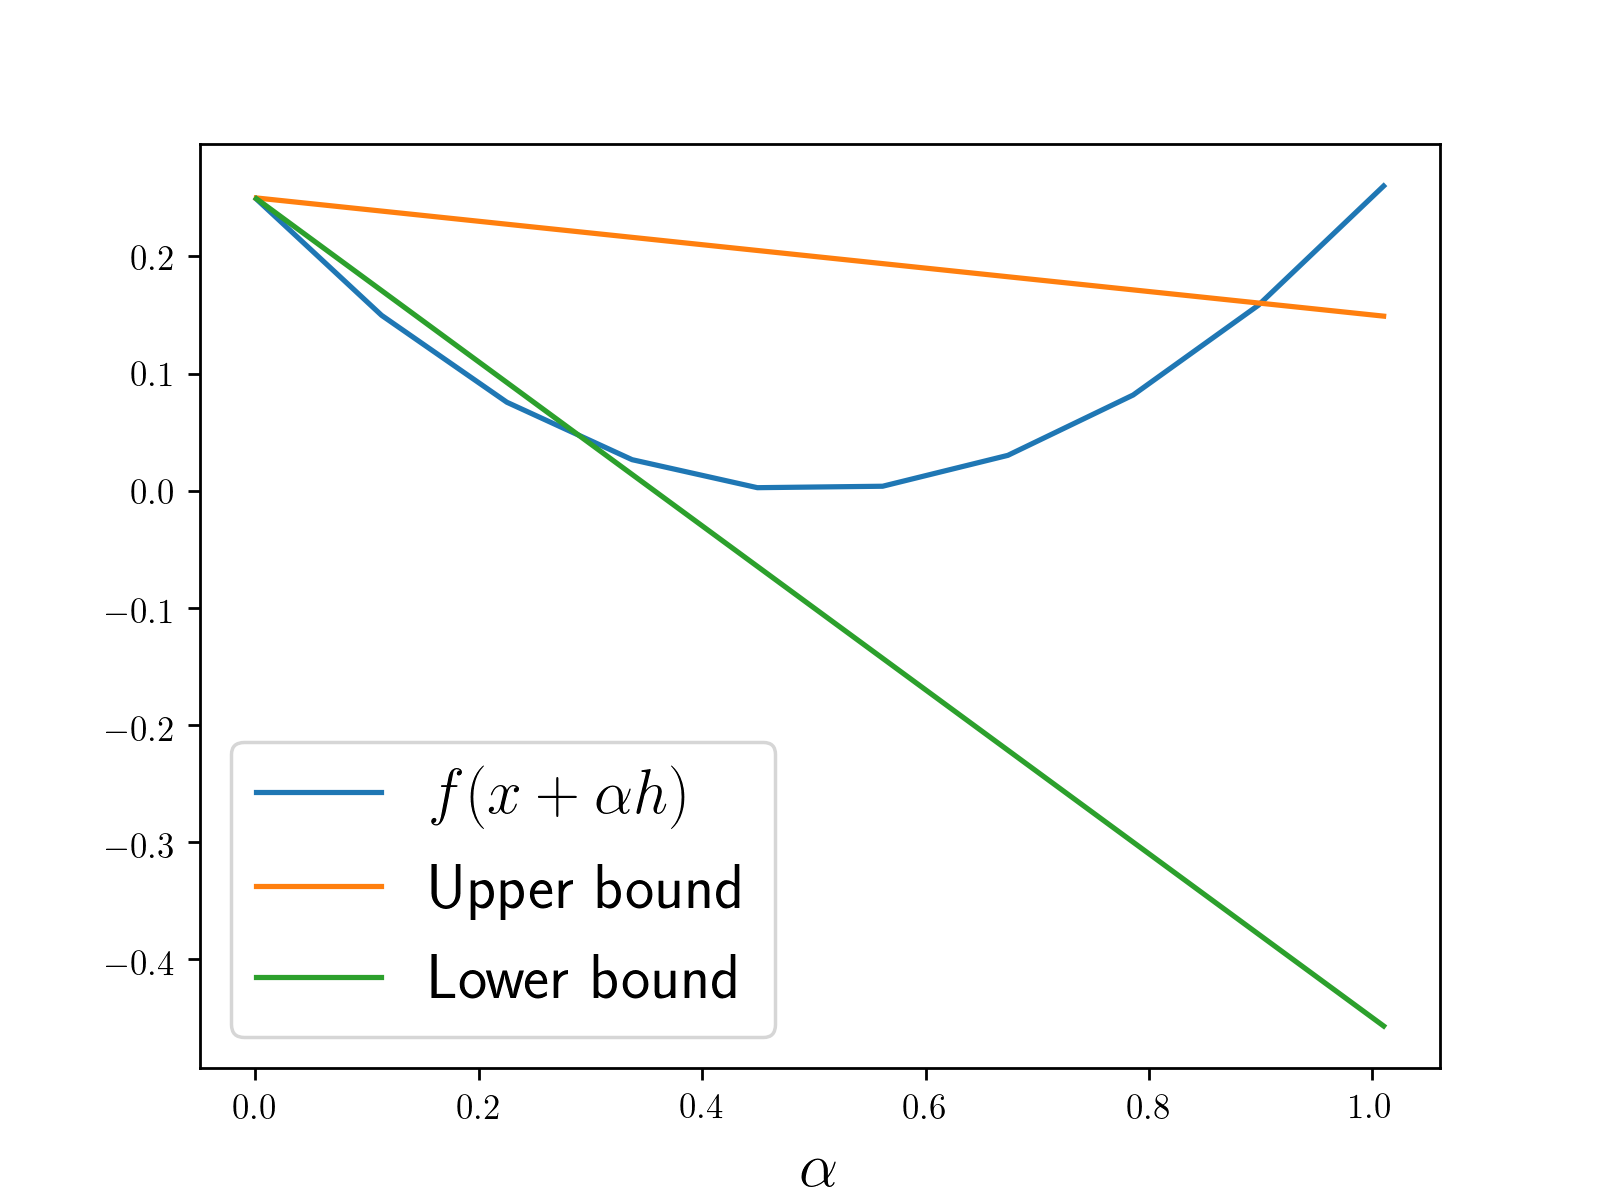

In [4]:
f = lambda x: x**2
grad = lambda x: 2 * x
beta1 = 0.1
beta2 = 0.7
x0 = 0.5
plot_alpha(f, grad, x0, -grad(x0), np.linspace(1e-3, 1.01, 10), beta1, beta2)

## $f(x) = x\log x$

<IPython.core.display.Javascript object>


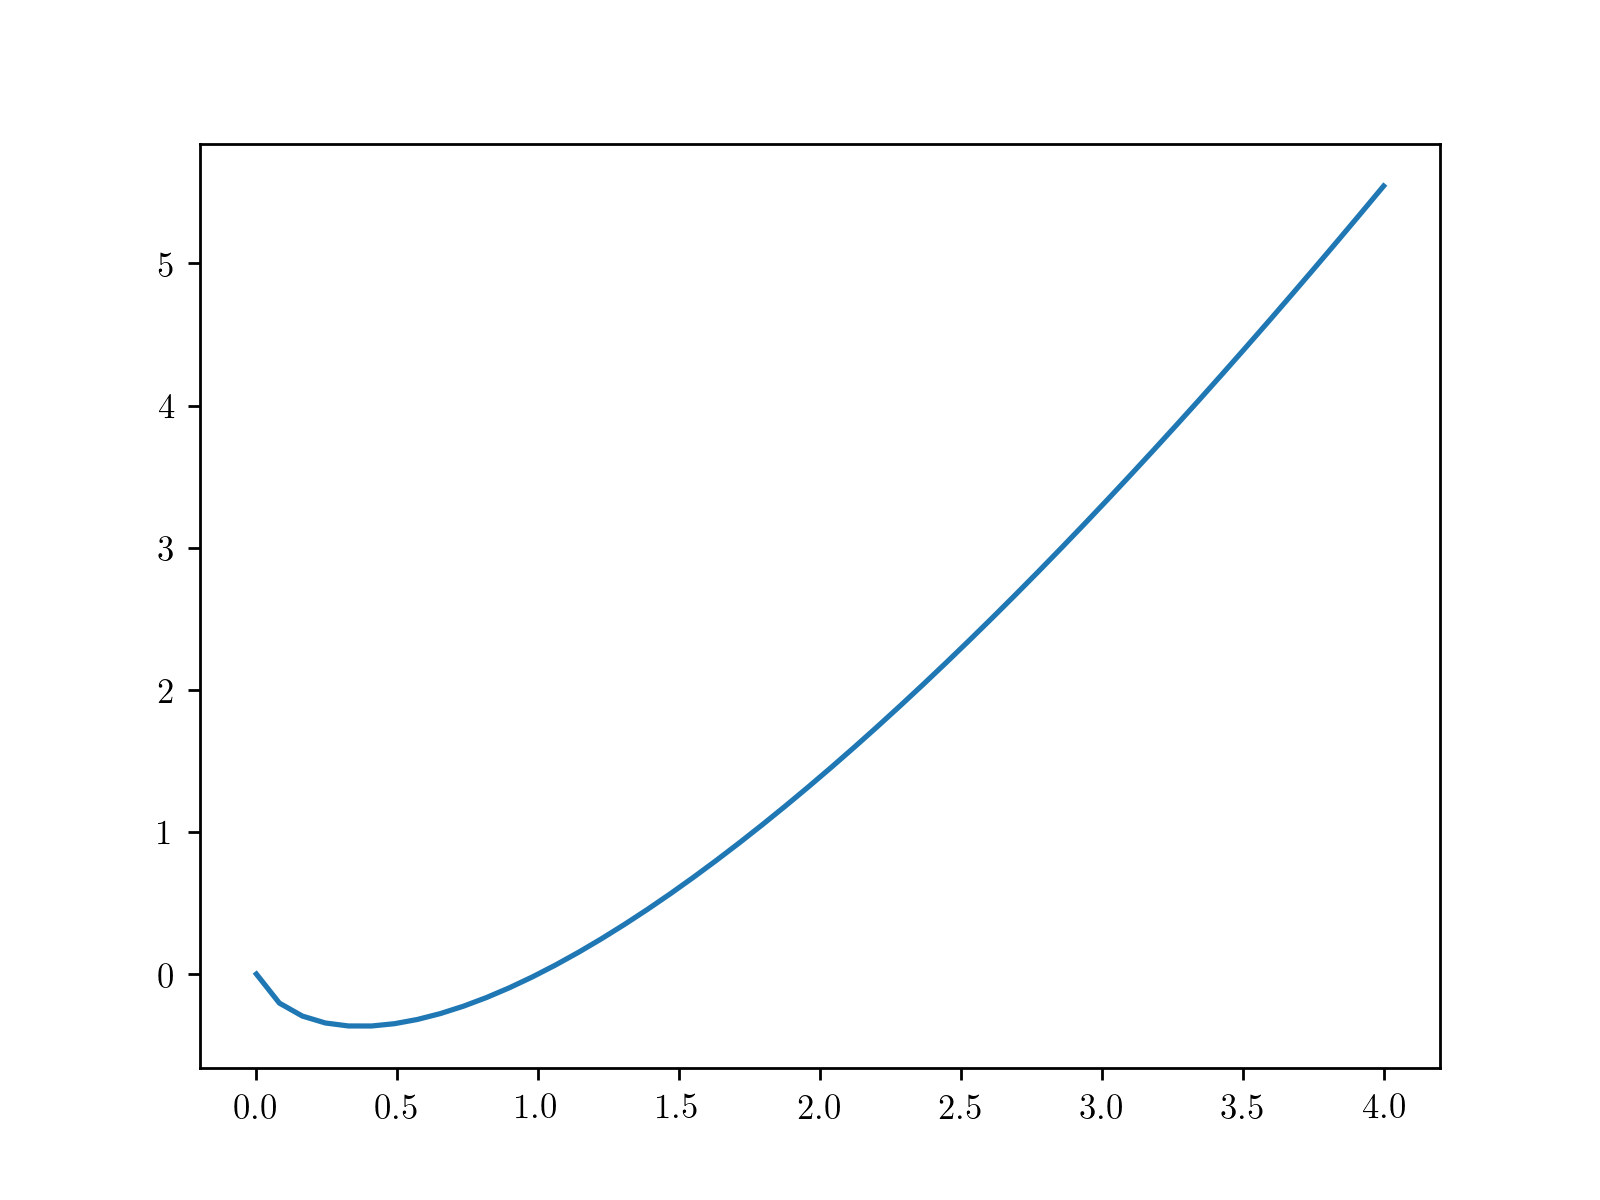

In [5]:
x_range = np.linspace(1e-10, 4)
plt.plot(x_range, x_range * np.log(x_range))

<IPython.core.display.Javascript object>


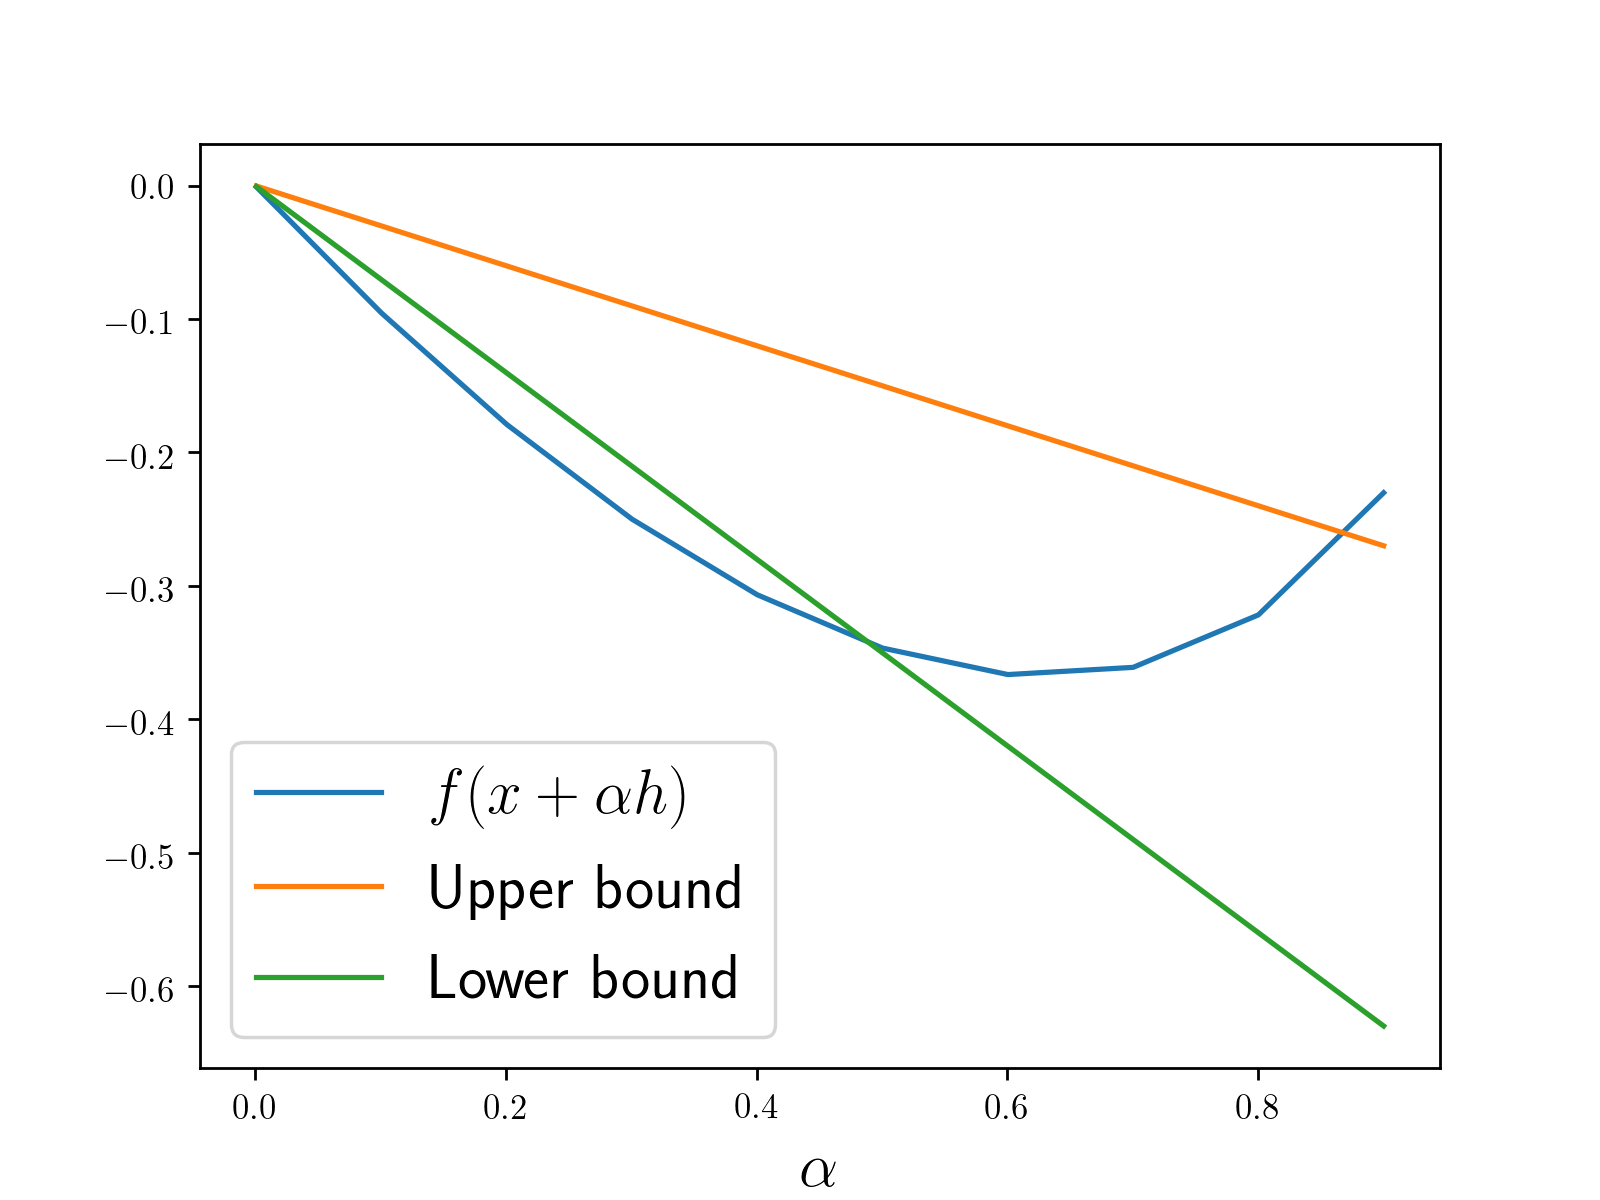

In [6]:
x0 = 1
f = lambda x: x * np.log(x)
grad = lambda x: np.log(x) + 1
beta1 = 0.3
beta2 = 0.7
plot_alpha(f, grad, x0, -grad(x0), np.linspace(1e-3, 0.9, 10), beta1, beta2)

### Backtracking 

```python

def SelectStepSize(x, f, h, rho, alpha0, beta1, beta2):
    
    # 0 < rho < 1
    
    # alpha0 - initial guess of step size
    
    # beta1 and beta2 - constants from conditions
    
    alpha = alpha0
    
    # Check violating sufficient decrease and curvature conditions
    
    while (f(x + alpha * h) >= f(x) + beta1 * alpha * grad_f(x_k).dot(h)) and 
    
          (grad_f(x + alpha * h).dot(h) <= beta2 * grad_f(x_k).dot(h)):
            
        alpha *= rho
        
    return alpha

```

### Gradient descent implementation

In [9]:
def GradientDescent(f, gradf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        gradient = gradf(x)
        alpha = line_search(x, -gradient, **opt_arg)
        x = x - alpha * gradient
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    return res

### Dependence of the gradient descent convergence on the condition number of $f''(x)$
Consider the problem
$$
\min f(x),
$$ 
where
$$ f(x) = x^{\top}Ax, \; A = \begin{bmatrix} 1 & 0\\ 0 & \gamma \end{bmatrix} $$

$$
f'(x) = 2Ax
$$

In [8]:
def my_f(x, A):
    return 0.5 * x.dot(A.dot(x))

def my_gradf(x, A):
    return A.dot(x)

<IPython.core.display.Javascript object>


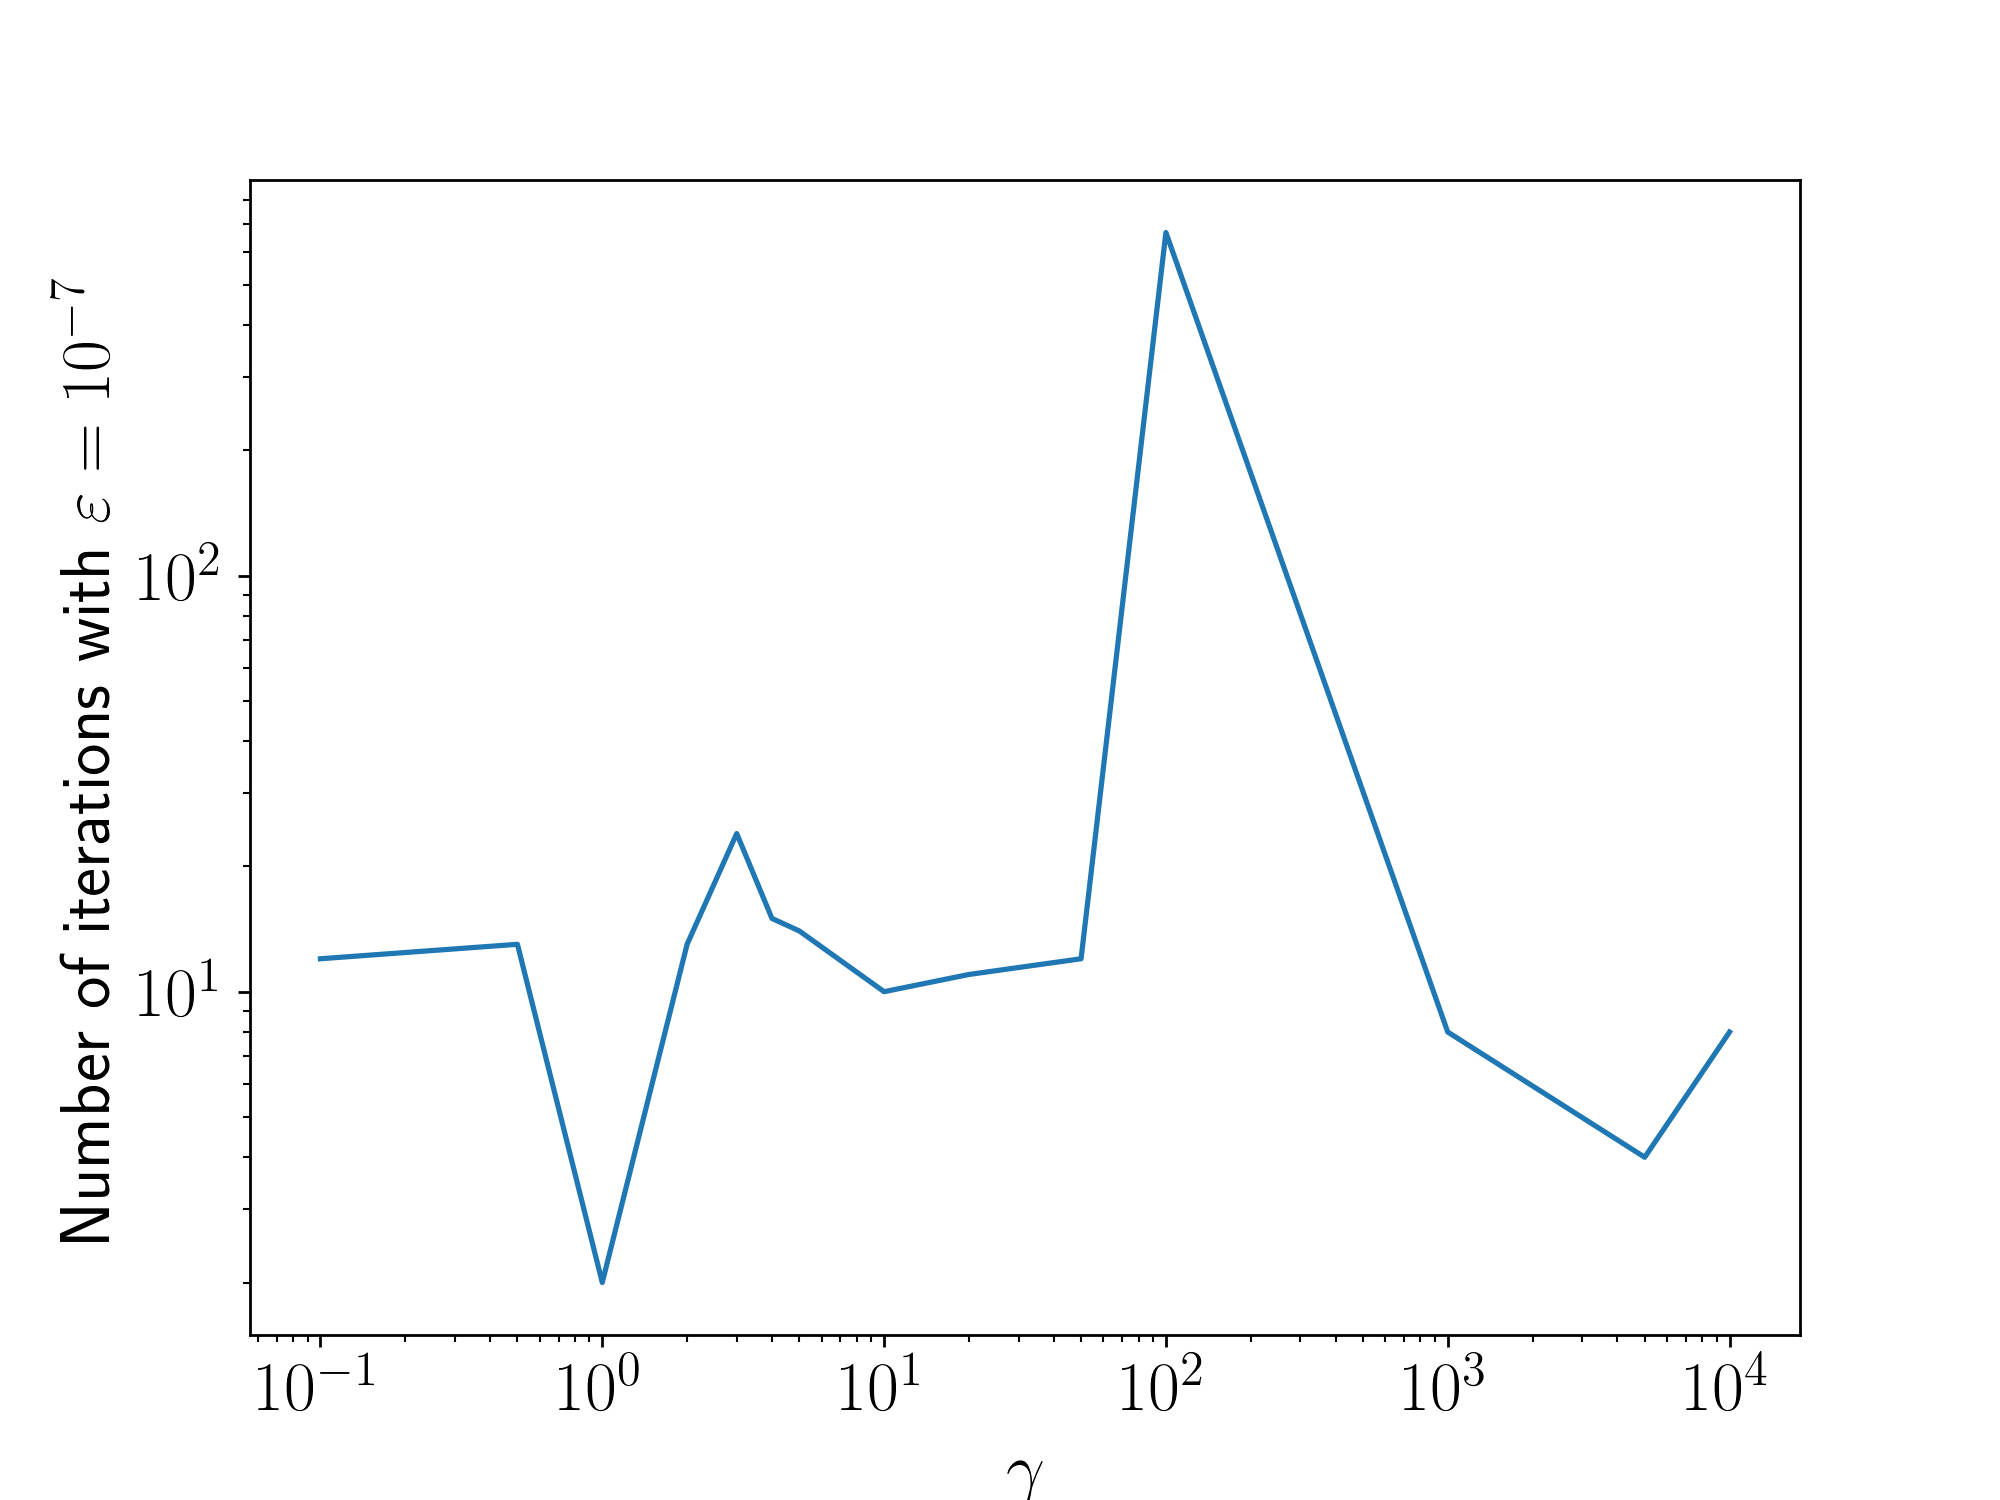

Text(0, 0.5, 'Number of iterations with $\\varepsilon = 10^{-7}$')

In [14]:
# To get the result here we use the implementation from side library
# To reproduce plots, you should install it via 
# ```pip install git+https://github.com/amkatrutsa/liboptpy```
# The best option is to install it in the separate conda-environment
# to not suffer anything in your base environment

plt.rc("text", usetex=True)

gammas = [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 50, 100, 1000, 5000, 10000]
# gammas = [1]
num_iter_converg = []
for g in gammas:
    A = np.array([[1, 0], 
                  [0, g]], dtype=np.float64)
    f = lambda x: my_f(x, A)
    gradf = lambda x: my_gradf(x, A)
    x0 = np.random.rand(A.shape[0])
#     x0 = np.sort(x0)
#     x0 = x0[::-1]
#     x0 = np.array([g, 1], dtype=np.float64)
#     print x0[1] / x0[0]
    gd = methods.fo.GradientDescent(f, gradf, ss.ExactLineSearch4Quad(A))
    x = gd.solve(x0, tol=1e-7, max_iter=10000)
    num_iter_converg.append(len(gd.get_convergence()))

plt.figure(figsize=(8, 6))
plt.loglog(gammas, num_iter_converg)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel(r"$\gamma$", fontsize=20)
plt.ylabel(r"Number of iterations with $\varepsilon = 10^{-7}$", fontsize=20)

## Multidimensional problem

Let $A \in \mathbb{R}^{m \times n}$. Consider: $Ax \leq 1$ while $|x_i| \leq 1$ for all $i$.

$$
f(x) = - \sum_{i=1}^m \log(1 - a_i^{\top}x) - \sum_{i = 1}^n \log (1 - x^2_i) \to \min_x
$$
$$
f'(x) - ?
$$

In [15]:
n = 100
m = 200
x0 = np.zeros(n)
A = np.random.rand(n, m)

### Exact solution with CVXPy

In [18]:
import cvxpy as cvx
print(cvx.installed_solvers())
x = cvx.Variable(n)

obj = cvx.Minimize(cvx.sum(-cvx.log(1 - A.T * x)) - 
                   cvx.sum(cvx.log(1 - cvx.square(x))))
prob = cvx.Problem(obj)
prob.solve(solver="SCS", verbose=True)
x = x.value
print("Optimal value =", prob.value)

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'MOSEK', 'OSQP', 'SCS']
----------------------------------------------------------------------------
	SCS v2.1.4 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 20700
eps = 1.00e-04, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 500, constraints m = 1200
Cones:	soc vars: 300, soc blks: 100
	exp vars: 900, dual exp vars: 0
Setup time: 6.83e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.49e+20  6.54e+21  8.61e-01 -2.83e+22 -2.12e+21  4.89e+22  6.67e-03 
    80| 1.69e-06  1.03e-05  8.44e-09 -6.49e+02 -6.49e+02  1.51e-14  2.44e-01 
-----

### Solving with gradient descent

In [20]:
f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), \
                          axis=1) + 2 * x / (1 - np.power(x, 2))

Required tolerance achieved!
Convergence in 19 iterations
Function value = -649.0342480710426
Norm of gradient = 1.4128492795957752e-06


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


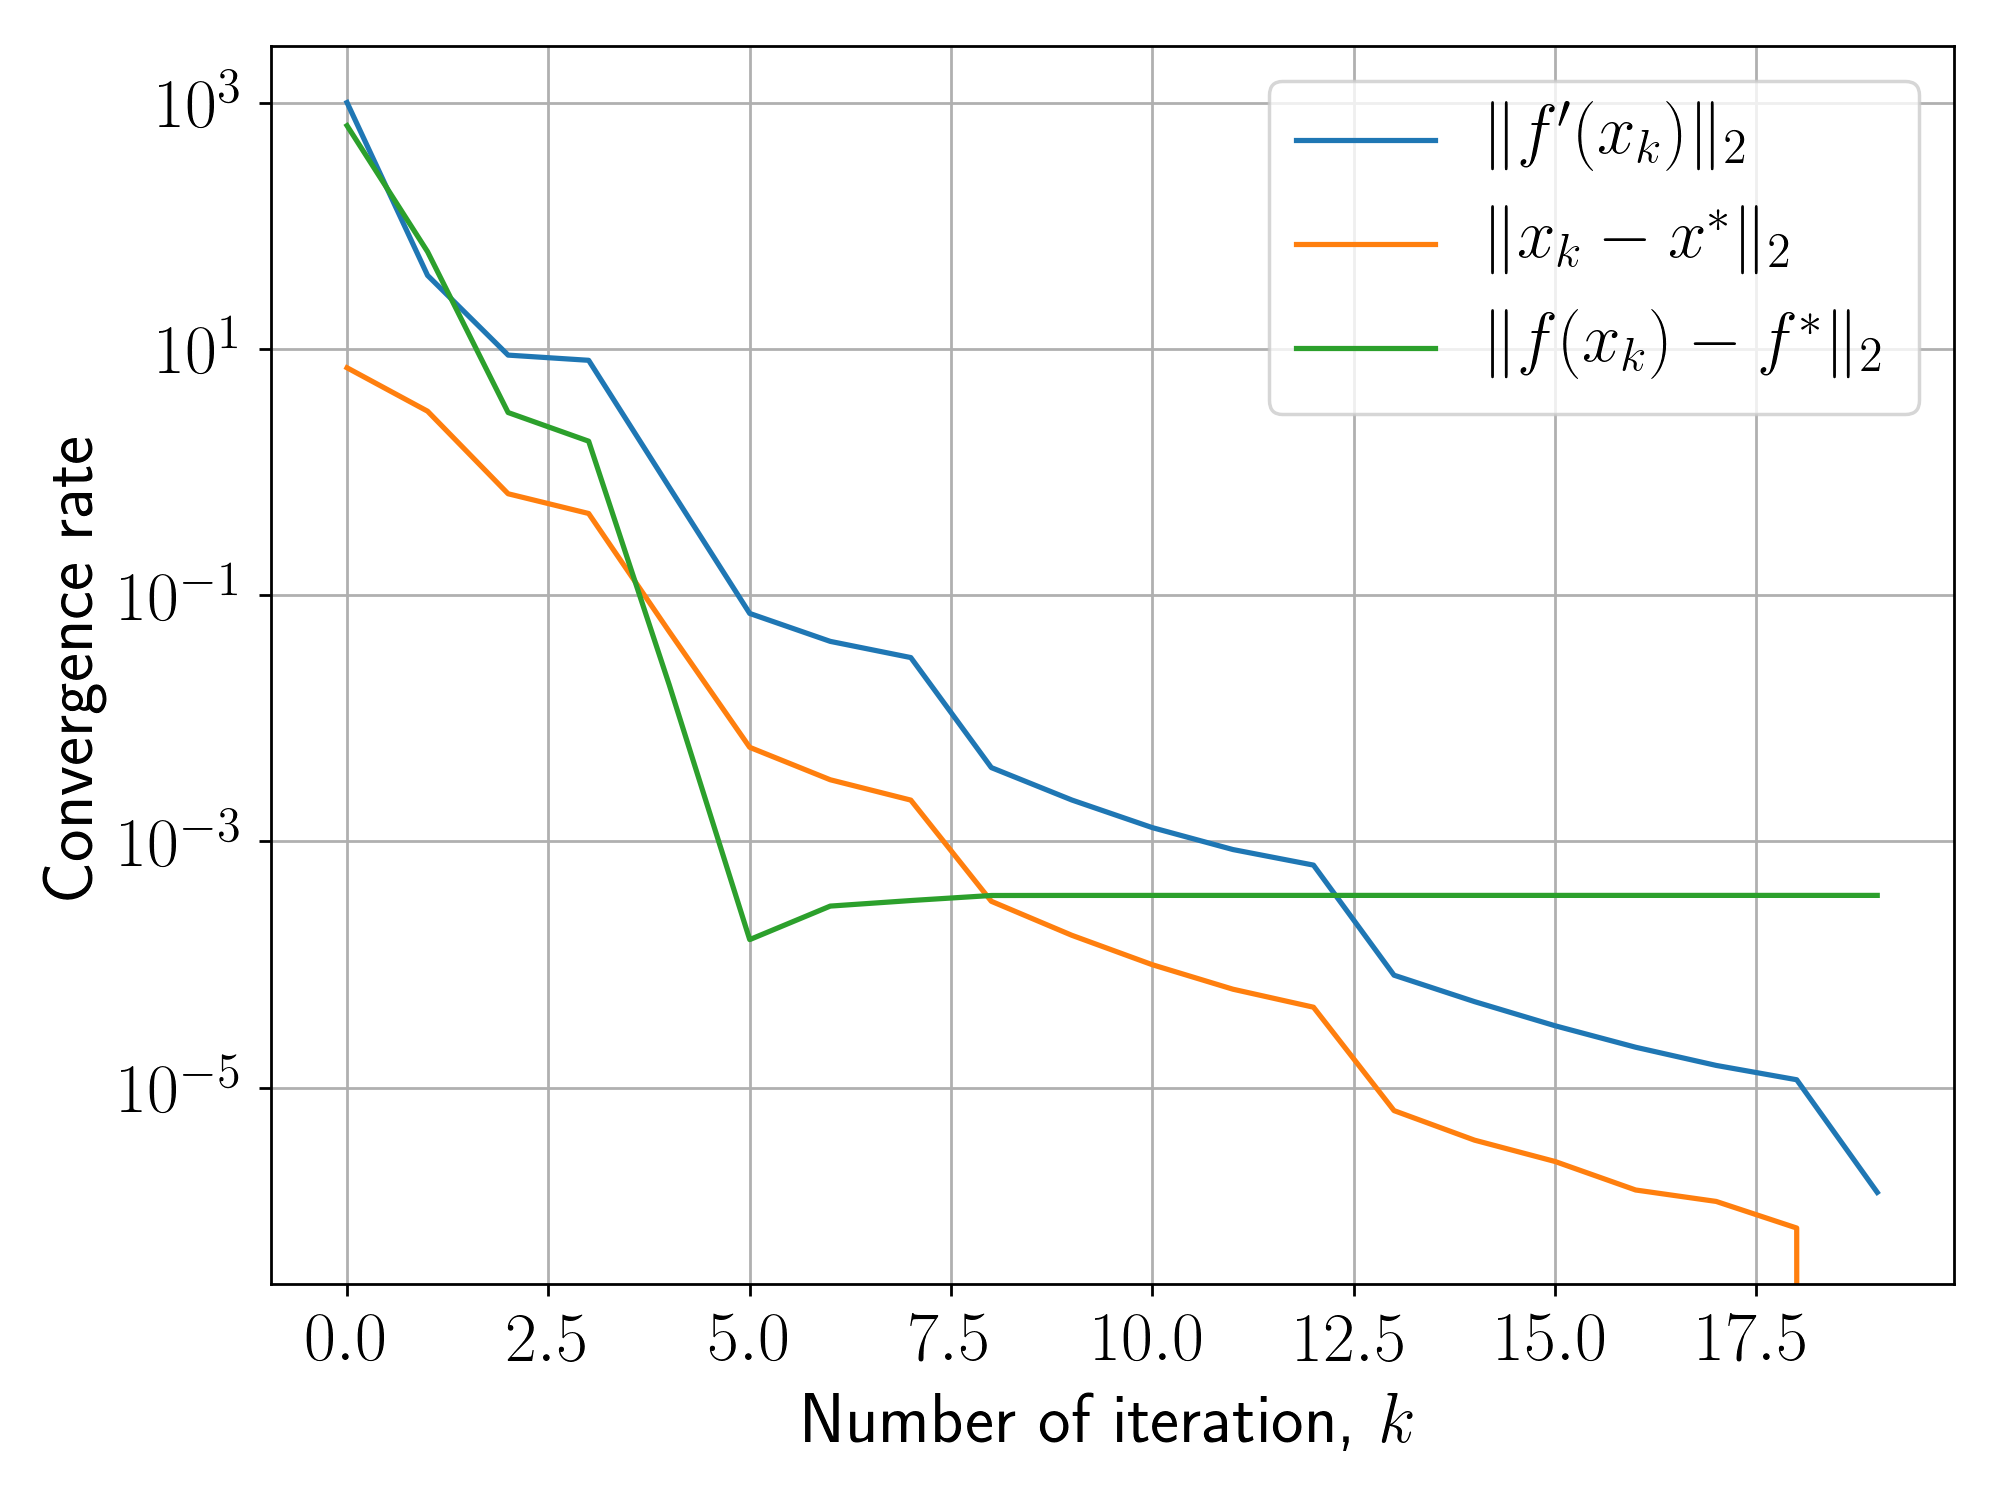

In [24]:
gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Armijo", rho=0.5, beta=0.1, init_alpha=1.))
x = gd.solve(x0, tol=1e-5, max_iter=100, disp=True)

x_conv = gd.get_convergence()
grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]
plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.semilogy([np.linalg.norm(x - np.array(x_k)) for x_k in x_conv], label=r"$\|x_k - x^*\|_2$")
plt.semilogy([np.linalg.norm(prob.value - f(np.array(x_k))) for x_k in x_conv], label=r"$\|f(x_k) - f^*\|_2$")
plt.xlabel(r"Number of iteration, $k$", fontsize=20)
plt.ylabel(r"Convergence rate", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.grid(True)
plt.tight_layout()

## Summary
1. Descent methods
2. Gradient descent
3. Step size selection
4. Experiments